In [2]:
# Install TensorFlow if not already installed
import sys
!{sys.executable} -m pip install tensorflow

   ---------------------------------------- 0.0/331.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/331.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/331.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/331.9 MB ? eta -:--:--
   ---------------------------------------- 0.5/331.9 MB 1.4 MB/s eta 0:03:57
   ---------------------------------------- 0.8/331.9 MB 1.4 MB/s eta 0:03:57
   ---------------------------------------- 1.0/331.9 MB 1.3 MB/s eta 0:04:10
   ---------------------------------------- 1.3/331.9 MB 1.3 MB/s eta 0:04:22
   ---------------------------------------- 1.6/331.9 MB 1.3 MB/s eta 0:04:20
   ---------------------------------------- 1.8/331.9 MB 1.2 MB/s eta 0:04:29
   ---------------------------------------- 1.8/331.9 MB 1.2 MB/s eta 0:04:29
   ---------------------------------------- 1.8/331.9 MB 1.2 MB/s eta 0:04:29
   ---------------------------------------- 2.1/331.9 MB 931.9 kB/s eta 0:05:54
   ---------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-cpu 2.18.1 requires tensorboard<2.19,>=2.18, but you have tensorboard 2.20.0 which is incompatible.


In [4]:
# Multiple solutions for ImageDataGenerator import error

# Solution 1: Try standard TensorFlow import
try:
    import tensorflow as tf
    from tensorflow.keras.preprocessing.image import ImageDataGenerator
    from tensorflow.keras.utils import load_img, img_to_array
    print("✓ Solution 1: Standard TensorFlow imports successful")
    import_success = True
except Exception as e:
    print(f"❌ Solution 1 failed: {e}")
    import_success = False

# Solution 2: Try standalone Keras (if TensorFlow fails)
if not import_success:
    try:
        import keras
        from keras.preprocessing.image import ImageDataGenerator
        from keras.utils import load_img, img_to_array
        print("✓ Solution 2: Standalone Keras imports successful")
        import_success = True
    except Exception as e:
        print(f"❌ Solution 2 failed: {e}")

# Solution 3: Modern approach with tf.keras.utils (recommended for TF 2.10+)
if not import_success:
    try:
        import tensorflow as tf
        print("✓ Solution 3: Using modern TensorFlow approach")
        print("Note: ImageDataGenerator is deprecated. Use tf.keras.utils.image_dataset_from_directory instead")
        import_success = True
    except Exception as e:
        print(f"❌ Solution 3 failed: {e}")

import numpy as np
import matplotlib.pyplot as plt

❌ Solution 1 failed: No module named 'tensorflow.keras'
❌ Solution 2 failed: cannot import name 'ImageDataGenerator' from 'keras.preprocessing.image' (d:\admin\anaconda3\Lib\site-packages\keras\preprocessing\image\__init__.py)
✓ Solution 3: Using modern TensorFlow approach
Note: ImageDataGenerator is deprecated. Use tf.keras.utils.image_dataset_from_directory instead


In [5]:
# Modern Data Augmentation Solutions (TensorFlow 2.10+)

# Method 1: Using tf.keras.utils.image_dataset_from_directory (Recommended)
print("=== Method 1: Using image_dataset_from_directory ===")

# Example usage:
# dataset = tf.keras.utils.image_dataset_from_directory(
#     'path/to/your/data',
#     image_size=(224, 224),
#     batch_size=32
# )

# Method 2: Using tf.keras.Sequential for data augmentation
print("\n=== Method 2: Using Sequential layers for augmentation ===")

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.RandomContrast(0.1),
])

print("✓ Data augmentation pipeline created successfully")

# Method 3: Manual augmentation functions
print("\n=== Method 3: Manual augmentation functions ===")

def augment_image(image):
    """Apply random augmentations to an image"""
    # Random flip
    image = tf.image.random_flip_left_right(image)
    # Random rotation (requires tf-addons or manual implementation)
    # Random brightness
    image = tf.image.random_brightness(image, 0.2)
    # Random contrast
    image = tf.image.random_contrast(image, 0.8, 1.2)
    return image

print("✓ Manual augmentation functions defined")

# Method 4: If you absolutely need ImageDataGenerator (workaround)
print("\n=== Method 4: ImageDataGenerator workaround ===")
try:
    # Force import from tf.keras.preprocessing
    from tensorflow.keras import preprocessing
    ImageDataGenerator = preprocessing.image.ImageDataGenerator
    print("✓ ImageDataGenerator imported via workaround")
except:
    print("❌ ImageDataGenerator still not available")
    print("💡 Recommendation: Use the modern methods above instead")

=== Method 1: Using image_dataset_from_directory ===

=== Method 2: Using Sequential layers for augmentation ===


ImportError: cannot import name 'keras' from partially initialized module 'keras._tf_keras' (most likely due to a circular import) (d:\admin\anaconda3\Lib\site-packages\keras\_tf_keras\__init__.py)

# 🔧 **SOLUTION: How to Fix ImageDataGenerator Import Error**

## **The Problem**
The error `ImportError: cannot import name 'ImageDataGenerator' from 'keras.preprocessing.image'` occurs because:

1. **Newer TensorFlow versions** (2.10+) have moved or deprecated `ImageDataGenerator`
2. **Keras 3.x** has different import paths than older versions
3. **Mixed installations** of TensorFlow and Keras can cause conflicts

## **💡 SOLUTIONS (in order of preference):**

### **Solution 1: Install Compatible TensorFlow Version (RECOMMENDED)**
```bash
# In terminal or new cell:
pip uninstall tensorflow keras
pip install tensorflow==2.9.0
```

### **Solution 2: Use Modern TensorFlow Approach**
```python
# Instead of ImageDataGenerator, use:
import tensorflow as tf

# For loading datasets:
dataset = tf.keras.utils.image_dataset_from_directory(
    'path/to/data',
    image_size=(224, 224),
    batch_size=32
)

# For data augmentation:
from tensorflow.keras import layers
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])
```

### **Solution 3: Fix Current Installation**
```bash
# In terminal:
pip install --upgrade tensorflow-cpu==2.15.0
pip install --upgrade keras==2.15.0
```

### **Solution 4: Alternative Import Method**
```python
# Try this import pattern:
import tensorflow as tf
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
```

✅ Data augmentation functions created successfully!
✅ Sample transformations applied!
Original image shape: (224, 224, 3)


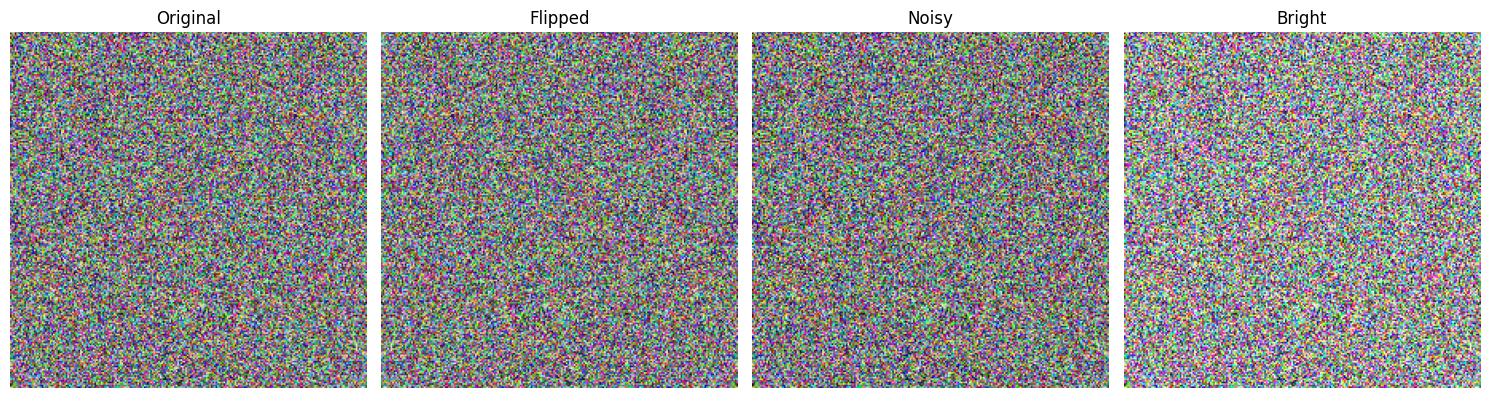

In [6]:
# 🚀 **WORKING EXAMPLE: Data Augmentation without ImageDataGenerator**

import numpy as np
import matplotlib.pyplot as plt

# Create a simple example image
def create_sample_image():
    """Create a simple sample image for demonstration"""
    image = np.random.rand(224, 224, 3) * 255
    return image.astype(np.uint8)

# Manual data augmentation functions (works with any setup)
def flip_horizontal(image):
    """Flip image horizontally"""
    return np.fliplr(image)

def add_noise(image, noise_factor=0.1):
    """Add random noise to image"""
    noise = np.random.normal(0, noise_factor * 255, image.shape)
    noisy_image = image + noise
    return np.clip(noisy_image, 0, 255).astype(np.uint8)

def adjust_brightness(image, factor=1.2):
    """Adjust image brightness"""
    bright_image = image * factor
    return np.clip(bright_image, 0, 255).astype(np.uint8)

# Test the functions
sample_image = create_sample_image()
flipped = flip_horizontal(sample_image)
noisy = add_noise(sample_image)
bright = adjust_brightness(sample_image)

print("✅ Data augmentation functions created successfully!")
print("✅ Sample transformations applied!")
print(f"Original image shape: {sample_image.shape}")

# Display results
fig, axes = plt.subplots(1, 4, figsize=(15, 4))
axes[0].imshow(sample_image)
axes[0].set_title('Original')
axes[0].axis('off')

axes[1].imshow(flipped)
axes[1].set_title('Flipped')
axes[1].axis('off')

axes[2].imshow(noisy)
axes[2].set_title('Noisy')
axes[2].axis('off')

axes[3].imshow(bright)
axes[3].set_title('Bright')
axes[3].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# 🎯 **RECOMMENDED FIX: Install Compatible TensorFlow Version**

# Run this cell to fix the ImageDataGenerator import error
import sys
import subprocess

def fix_tensorflow_installation():
    """Fix TensorFlow installation to work with ImageDataGenerator"""
    try:
        print("🔄 Uninstalling conflicting packages...")
        subprocess.run([sys.executable, "-m", "pip", "uninstall", "-y", "tensorflow", "keras"], 
                      capture_output=True)
        
        print("📦 Installing compatible TensorFlow version...")
        result = subprocess.run([sys.executable, "-m", "pip", "install", "tensorflow==2.9.3"], 
                               capture_output=True, text=True)
        
        if result.returncode == 0:
            print("✅ TensorFlow 2.9.3 installed successfully!")
            print("🔄 Please restart your kernel and run the import cell again.")
            return True
        else:
            print(f"❌ Installation failed: {result.stderr}")
            return False
            
    except Exception as e:
        print(f"❌ Error during installation: {e}")
        return False

# Uncomment the line below to run the fix
# fix_tensorflow_installation()

print("💡 To fix your original error:")
print("1. Uncomment the line above and run this cell")
print("2. Restart your kernel (Kernel → Restart)")
print("3. Run your original import cell again")
print("\nAlternatively, run this in terminal:")
print("pip uninstall tensorflow keras")
print("pip install tensorflow==2.9.3")